In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from scipy.linalg import toeplitz

## Test data

In [3]:
INPUT_SIZE = 64
INPUT_CHANNELS = 3
OUTPUT_SIZE = 62

spike_indices = np.asarray([197, 200, 203, 206, 209, 212, 215, 218, 221, 224,
    227, 230, 233, 236, 239, 242, 245, 248, 251, 254,
    257, 260, 263, 266, 269, 272, 275, 278, 281, 284,
    287, 290, 293, 296, 299, 302, 305, 308, 311, 314,
    317, 320, 323, 326, 329, 332, 389, 392, 395, 398,
    401, 404, 407, 410, 413, 416, 419, 422, 425, 428,
    431, 434, 437, 440, 443, 446, 449, 452, 455, 458,
    461, 464, 467, 470, 473, 476, 479, 482, 485, 488,
    491, 494, 497, 500, 503, 506, 509, 512, 515, 518,
    521, 524, 581, 584, 587, 590, 593, 596, 599, 602,
    605, 608, 611, 614, 617, 620, 623, 626, 629, 632,
    635, 638, 641, 644, 647, 773, 776, 779, 782, 785,
    788, 791, 794, 797, 800, 803, 806, 809, 812, 815,
    818, 821, 824, 827, 830, 833, 836, 839, 965, 968,
    971, 974, 977, 980, 983, 986, 989, 992, 995, 998,
    1001, 1004, 1007, 1010, 1013, 1016, 1019, 1022, 1025, 1028,
    1031, 1157, 1160, 1163, 1166, 1169, 1172, 1175, 1178, 1181,
    1184, 1187, 1190, 1193, 1196, 1199, 1202, 1205, 1208, 1211,
    1214, 1217, 1220, 1223, 1349, 1352, 1355, 1358, 1361, 1364,
    1367, 1370, 1373, 1376, 1379, 1382, 1385, 1388, 1391, 1394,
    1397, 1400, 1403, 1406, 1409, 1412, 1415, 1521, 1523, 1524,
    1526, 1541, 1544, 1547, 1550, 1553, 1556, 1559, 1562, 1565,
    1568, 1571, 1574, 1577, 1580, 1583, 1586, 1589, 1592, 1595,
    1598, 1601, 1604, 1607, 1704, 1706, 1707, 1709, 1710, 1712,
    1713, 1715, 1733, 1736, 1739, 1742, 1745, 1748, 1751, 1754,
    1757, 1760, 1763, 1766, 1769, 1772, 1775, 1778, 1781, 1784,
    1787, 1790, 1793, 1796, 1799, 1887, 1889, 1890, 1892, 1893,
    1895, 1896, 1898, 1899, 1901, 1902, 1904, 1925, 1928, 1931,
    1934, 1937, 1940, 1943, 1946, 1949, 1952, 1955, 1958, 1961,
    1964, 1967, 1970, 1973, 1976, 1979, 1982, 1985, 1988, 1991,
    2070, 2072, 2073, 2075, 2076, 2078, 2079, 2081, 2082, 2084,
    2085, 2087, 2088, 2090, 2091, 2093, 2117, 2120, 2123, 2126,
    2129, 2132, 2135, 2138, 2141, 2144, 2147, 2150, 2153, 2156,
    2159, 2162, 2165, 2168, 2171, 2174, 2177, 2180, 2183, 2250,
    2252, 2253, 2255, 2256, 2258, 2259, 2261, 2262, 2264, 2265,
    2267, 2268, 2270, 2271, 2273, 2274, 2276, 2277, 2279, 2280,
    2282, 2309, 2312, 2315, 2318, 2321, 2324, 2327, 2330, 2333,
    2336, 2339, 2342, 2345, 2348, 2351, 2354, 2357, 2360, 2363,
    2366, 2369, 2372, 2375, 2430, 2432, 2433, 2435, 2436, 2438,
    2439, 2441, 2442, 2444, 2445, 2447, 2448, 2450, 2451, 2453,
    2454, 2456, 2457, 2459, 2460, 2462, 2463, 2465, 2466, 2468,
    2469, 2471, 2501, 2504, 2507, 2510, 2513, 2516, 2519, 2522,
    2525, 2528, 2531, 2534, 2537, 2540, 2543, 2546, 2549, 2552,
    2555, 2558, 2561, 2564, 2567, 2613, 2615, 2616, 2618, 2619,
    2621, 2622, 2624, 2625, 2627, 2628, 2630, 2631, 2633, 2634,
    2636, 2637, 2639, 2640, 2642, 2643, 2645, 2646, 2648, 2649,
    2651, 2652, 2654, 2655, 2657, 2658, 2660, 2693, 2696, 2699,
    2702, 2705, 2708, 2711, 2714, 2717, 2720, 2723, 2726, 2729,
    2732, 2735, 2738, 2741, 2744, 2747, 2750, 2753, 2756, 2759,
    2796, 2798, 2799, 2801, 2802, 2804, 2805, 2807, 2808, 2810,
    2811, 2813, 2814, 2816, 2817, 2819, 2820, 2822, 2823, 2825,
    2826, 2828, 2829, 2831, 2832, 2834, 2835, 2837, 2838, 2840,
    2841, 2843, 2844, 2846, 2847, 2849, 2976, 2978, 2979, 2981,
    2982, 2984, 2985, 2987, 2988, 2990, 2991, 2993, 2994, 2996,
    2997, 2999, 3000, 3002, 3003, 3005, 3006, 3008, 3009, 3011,
    3012, 3014, 3015, 3017, 3018, 3020, 3021, 3023, 3024, 3026,
    3027, 3029, 3030, 3032, 3033, 3035, 3036, 3038, 3159, 3161,
    3162, 3164, 3165, 3167, 3168, 3170, 3171, 3173, 3174, 3176,
    3177, 3179, 3180, 3182, 3183, 3185, 3186, 3188, 3189, 3191,
    3192, 3194, 3195, 3197, 3198, 3200, 3201, 3203, 3204, 3206,
    3207, 3209, 3210, 3212, 3213, 3215, 3216, 3218, 3219, 3221,
    3222, 3224, 3225, 3227, 3342, 3344, 3345, 3347, 3348, 3350,
    3351, 3353, 3354, 3356, 3357, 3359, 3360, 3362, 3363, 3365,
    3366, 3368, 3369, 3371, 3372, 3374, 3375, 3377, 3378, 3380,
    3381, 3383, 3384, 3386, 3387, 3389, 3390, 3392, 3393, 3395,
    3396, 3398, 3399, 3401, 3402, 3404, 3405, 3407, 3408, 3410,
    3411, 3413, 3414, 3416, 3522, 3524, 3525, 3527, 3528, 3530,
    3531, 3533, 3534, 3536, 3537, 3539, 3540, 3542, 3543, 3545,
    3546, 3548, 3549, 3551, 3552, 3554, 3555, 3557, 3558, 3560,
    3561, 3563, 3564, 3566, 3567, 3569, 3570, 3572, 3573, 3575,
    3576, 3578, 3579, 3581, 3582, 3584, 3585, 3587, 3588, 3590,
    3591, 3593, 3594, 3596, 3597, 3599, 3600, 3602, 3603, 3605,
    3652, 3655, 3658, 3661, 3664, 3667, 3670, 3673, 3676, 3679,
    3682, 3685, 3688, 3691, 3694, 3697, 3705, 3707, 3708, 3710,
    3711, 3713, 3714, 3716, 3717, 3719, 3720, 3722, 3723, 3725,
    3726, 3728, 3729, 3731, 3732, 3734, 3735, 3737, 3738, 3740,
    3741, 3743, 3744, 3746, 3747, 3749, 3750, 3752, 3753, 3755,
    3756, 3758, 3759, 3761, 3762, 3764, 3765, 3767, 3768, 3770,
    3771, 3773, 3774, 3776, 3777, 3779, 3780, 3782, 3783, 3785,
    3786, 3788, 3789, 3791, 3792, 3794, 3844, 3847, 3850, 3853,
    3856, 3859, 3862, 3865, 3868, 3871, 3874, 3877, 3880, 3883,
    3886, 3889, 3897, 3899, 3900, 3902, 3903, 3905, 3906, 3908,
    3909, 3911, 3912, 3914, 3915, 3917, 3918, 3920, 3921, 3923,
    3924, 3926, 3927, 3929, 3930, 3932, 3933, 3935, 3936, 3938,
    3939, 3941, 3942, 3944, 3945, 3947, 3948, 3950, 3951, 3953,
    3954, 3956, 3957, 3959, 3960, 3962, 3963, 3965, 3966, 3968,
    3969, 3971, 3972, 3974, 3975, 3977, 3978, 3980, 3981, 3983,
    3984, 3986, 4036, 4039, 4042, 4045, 4048, 4051, 4054, 4057,
    4060, 4063, 4066, 4069, 4072, 4075, 4078, 4081, 4098, 4100,
    4101, 4103, 4104, 4106, 4107, 4109, 4110, 4112, 4113, 4115,
    4116, 4118, 4119, 4121, 4122, 4124, 4125, 4127, 4128, 4130,
    4131, 4133, 4134, 4136, 4137, 4139, 4140, 4142, 4143, 4145,
    4146, 4148, 4149, 4151, 4152, 4154, 4155, 4157, 4158, 4160,
    4161, 4163, 4164, 4166, 4167, 4169, 4170, 4172, 4173, 4175,
    4176, 4178, 4179, 4181, 4228, 4231, 4234, 4237, 4240, 4243,
    4246, 4249, 4252, 4255, 4258, 4261, 4264, 4267, 4270, 4273,
    4299, 4301, 4302, 4304, 4305, 4307, 4308, 4310, 4311, 4313,
    4314, 4316, 4317, 4319, 4320, 4322, 4323, 4325, 4326, 4328,
    4329, 4331, 4332, 4334, 4335, 4337, 4338, 4340, 4341, 4343,
    4344, 4346, 4347, 4349, 4350, 4352, 4353, 4355, 4356, 4358,
    4359, 4361, 4362, 4364, 4365, 4367, 4368, 4370, 4371, 4373,
    4374, 4376, 4420, 4423, 4426, 4429, 4432, 4435, 4438, 4441,
    4444, 4447, 4450, 4453, 4456, 4459, 4462, 4465, 4503, 4505,
    4506, 4508, 4509, 4511, 4512, 4514, 4515, 4517, 4518, 4520,
    4521, 4523, 4524, 4526, 4527, 4529, 4530, 4532, 4533, 4535,
    4536, 4538, 4539, 4541, 4542, 4544, 4545, 4547, 4548, 4550,
    4551, 4553, 4554, 4556, 4557, 4559, 4560, 4562, 4563, 4565,
    4566, 4568, 4569, 4571, 4612, 4615, 4618, 4621, 4624, 4627,
    4630, 4633, 4636, 4639, 4642, 4645, 4648, 4651, 4654, 4657,
    4704, 4706, 4707, 4709, 4710, 4712, 4713, 4715, 4716, 4718,
    4719, 4721, 4722, 4724, 4725, 4727, 4728, 4730, 4731, 4733,
    4734, 4736, 4737, 4739, 4740, 4742, 4743, 4745, 4746, 4748,
    4749, 4751, 4752, 4754, 4755, 4757, 4758, 4760, 4761, 4763,
    4764, 4766, 4804, 4807, 4810, 4813, 4816, 4819, 4822, 4825,
    4828, 4831, 4834, 4837, 4840, 4843, 4846, 4849, 4908, 4910,
    4911, 4913, 4914, 4916, 4917, 4919, 4920, 4922, 4923, 4925,
    4926, 4928, 4929, 4931, 4932, 4934, 4935, 4937, 4938, 4940,
    4941, 4943, 4944, 4946, 4947, 4949, 4950, 4952, 4953, 4955,
    4956, 4958, 4959, 4961, 4996, 4999, 5002, 5005, 5008, 5011,
    5014, 5017, 5020, 5023, 5026, 5029, 5032, 5035, 5038, 5041,
    5109, 5111, 5112, 5114, 5115, 5117, 5118, 5120, 5121, 5123,
    5124, 5126, 5127, 5129, 5130, 5132, 5133, 5135, 5136, 5138,
    5139, 5141, 5142, 5144, 5145, 5147, 5148, 5150, 5151, 5153,
    5154, 5156, 5188, 5191, 5194, 5197, 5200, 5203, 5206, 5209,
    5212, 5215, 5218, 5221, 5224, 5227, 5230, 5233, 5310, 5312,
    5313, 5315, 5316, 5318, 5319, 5321, 5322, 5324, 5325, 5327,
    5328, 5330, 5331, 5333, 5334, 5336, 5337, 5339, 5340, 5342,
    5343, 5345, 5346, 5348, 5349, 5351, 5380, 5383, 5386, 5389,
    5392, 5395, 5398, 5401, 5404, 5407, 5410, 5413, 5416, 5419,
    5422, 5425, 5511, 5513, 5514, 5516, 5517, 5519, 5520, 5522,
    5523, 5525, 5526, 5528, 5529, 5531, 5532, 5534, 5535, 5537,
    5538, 5540, 5541, 5543, 5544, 5546, 5572, 5575, 5578, 5581,
    5584, 5587, 5590, 5593, 5596, 5599, 5602, 5605, 5608, 5611,
    5614, 5617, 5712, 5714, 5715, 5717, 5718, 5720, 5721, 5723,
    5724, 5726, 5727, 5729, 5730, 5732, 5733, 5735, 5736, 5738,
    5739, 5741, 5764, 5767, 5770, 5773, 5776, 5779, 5782, 5785,
    5788, 5791, 5794, 5797, 5800, 5803, 5806, 5809, 5916, 5918,
    5919, 5921, 5922, 5924, 5925, 5927, 5928, 5930, 5931, 5933,
    5934, 5936, 5956, 5959, 5962, 5965, 5968, 5971, 5974, 5977,
    5980, 5983, 5986, 5989, 5992, 5995, 5998, 6001, 6117, 6119,
    6120, 6122, 6123, 6125, 6126, 6128, 6129, 6131, 6148, 6151,
    6154, 6157, 6160, 6163, 6166, 6169, 6172, 6175, 6178, 6181,
    6184, 6187, 6190, 6193, 6318, 6320, 6321, 6323, 6324, 6326,
    6803, 6806, 6809, 6812, 6815, 6818, 6821, 6824, 6827, 6830,
    6833, 6836, 6839, 6842, 6845, 6848, 6851, 6854, 6857, 6860,
    6863, 6866, 6915, 6918, 6921, 6924, 6927, 6930, 6933, 6936,
    6939, 6942, 6945, 6948, 6951, 6954, 6957, 6960, 6963, 6966,
    6969, 6995, 6998, 7001, 7004, 7007, 7010, 7013, 7016, 7019,
    7022, 7025, 7028, 7031, 7034, 7037, 7040, 7043, 7046, 7049,
    7052, 7055, 7058, 7110, 7113, 7116, 7119, 7122, 7125, 7128,
    7131, 7134, 7137, 7140, 7143, 7146, 7149, 7152, 7155, 7158,
    7161, 7187, 7190, 7193, 7196, 7199, 7202, 7205, 7208, 7211,
    7214, 7217, 7220, 7223, 7226, 7229, 7232, 7235, 7238, 7241,
    7244, 7247, 7250, 7305, 7308, 7311, 7314, 7317, 7320, 7323,
    7326, 7329, 7332, 7335, 7338, 7341, 7344, 7347, 7350, 7353,
    7379, 7382, 7385, 7388, 7391, 7394, 7397, 7400, 7403, 7406,
    7409, 7412, 7415, 7418, 7421, 7424, 7427, 7430, 7433, 7436,
    7439, 7442, 7500, 7503, 7506, 7509, 7512, 7515, 7518, 7521,
    7524, 7527, 7530, 7533, 7536, 7539, 7542, 7545, 7571, 7574,
    7577, 7580, 7583, 7586, 7589, 7592, 7595, 7598, 7601, 7604,
    7607, 7610, 7613, 7616, 7619, 7622, 7625, 7628, 7631, 7634,
    7695, 7698, 7701, 7704, 7707, 7710, 7713, 7716, 7719, 7722,
    7725, 7728, 7731, 7734, 7737, 7763, 7766, 7769, 7772, 7775,
    7778, 7781, 7784, 7787, 7790, 7793, 7796, 7799, 7802, 7805,
    7808, 7811, 7814, 7817, 7820, 7823, 7826, 7890, 7893, 7896,
    7899, 7902, 7905, 7908, 7911, 7914, 7917, 7920, 7923, 7926,
    7929, 7955, 7958, 7961, 7964, 7967, 7970, 7973, 7976, 7979,
    7982, 7985, 7988, 7991, 7994, 7997, 8000, 8003, 8006, 8009,
    8012, 8015, 8018, 8085, 8088, 8091, 8094, 8097, 8100, 8103,
    8106, 8109, 8112, 8115, 8118, 8121, 8147, 8150, 8153, 8156,
    8159, 8162, 8165, 8168, 8171, 8174, 8177, 8180, 8183, 8186,
    8189, 8192, 8195, 8198, 8201, 8204, 8207, 8210, 8280, 8283,
    8286, 8289, 8292, 8295, 8298, 8301, 8304, 8307, 8310, 8313,
    8339, 8342, 8345, 8348, 8351, 8354, 8357, 8360, 8363, 8366,
    8369, 8372, 8375, 8378, 8381, 8384, 8387, 8390, 8393, 8396,
    8399, 8402, 8475, 8478, 8481, 8484, 8487, 8490, 8493, 8496,
    8499, 8502, 8505, 8531, 8534, 8537, 8540, 8543, 8546, 8549,
    8552, 8555, 8558, 8561, 8564, 8567, 8570, 8573, 8576, 8579,
    8582, 8585, 8588, 8591, 8594, 8670, 8673, 8676, 8679, 8682,
    8685, 8688, 8691, 8694, 8697, 8723, 8726, 8729, 8732, 8735,
    8738, 8741, 8744, 8747, 8750, 8753, 8756, 8759, 8762, 8765,
    8768, 8771, 8774, 8777, 8780, 8783, 8786, 8865, 8868, 8871,
    8874, 8877, 8880, 8883, 8886, 8889, 8915, 8918, 8921, 8924,
    8927, 8930, 8933, 8936, 8939, 8942, 8945, 8948, 8951, 8954,
    8957, 8960, 8963, 8966, 8969, 8972, 8975, 8978, 9060, 9063,
    9066, 9069, 9072, 9075, 9078, 9081, 9107, 9110, 9113, 9116,
    9119, 9122, 9125, 9128, 9131, 9134, 9137, 9140, 9143, 9146,
    9149, 9152, 9155, 9158, 9161, 9164, 9167, 9170, 9255, 9258,
    9261, 9264, 9267, 9270, 9273, 9299, 9302, 9305, 9308, 9311,
    9314, 9317, 9320, 9323, 9326, 9329, 9332, 9335, 9338, 9341,
    9344, 9347, 9350, 9353, 9356, 9359, 9362, 9450, 9453, 9456,
    9459, 9462, 9465, 9645, 9648, 9651, 9654, 9657, 9840, 9843,
    9846, 9849, 10035, 10038, 10041, 10230, 10233, 10425, 10641, 10642,
    10643, 10644, 10645, 10646, 10647, 10648, 10649, 10650, 10651, 10652,
    10653, 10654, 10655, 10824, 10825, 10826, 10827, 10828, 10829, 10830,
    10831, 10832, 10833, 10834, 10835, 10836, 10837, 10838, 10839, 10840,
    10841, 10842, 10843, 10844, 10845, 10846, 10847, 10848, 10849, 10850,
    10851, 10852, 10853, 10854, 10855, 10856, 11007, 11008, 11009, 11010,
    11011, 11012, 11013, 11014, 11015, 11016, 11017, 11018, 11019, 11020,
    11021, 11022, 11023, 11024, 11025, 11026, 11027, 11028, 11029, 11030,
    11031, 11032, 11033, 11034, 11035, 11036, 11037, 11038, 11039, 11040,
    11041, 11042, 11043, 11044, 11045, 11046, 11047, 11048, 11049, 11050,
    11051, 11052, 11053, 11054, 11055, 11056, 11057, 11058, 11059, 11060,
    11190, 11191, 11192, 11193, 11194, 11195, 11196, 11197, 11198, 11199,
    11200, 11201, 11202, 11203, 11204, 11205, 11206, 11207, 11208, 11209,
    11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11219,
    11220, 11221, 11222, 11223, 11224, 11225, 11226, 11227, 11228, 11229,
    11230, 11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239,
    11240, 11241, 11242, 11243, 11244, 11245, 11246, 11247, 11248, 11249,
    11250, 11251, 11252, 11253, 11254, 11255, 11256, 11257, 11258, 11259,
    11260, 11261, 11370, 11371, 11372, 11373, 11374, 11375, 11376, 11377,
    11378, 11379, 11380, 11381, 11382, 11383, 11384, 11385, 11386, 11387,
    11388, 11389, 11390, 11391, 11392, 11393, 11394, 11395, 11396, 11397,
    11398, 11399, 11400, 11401, 11402, 11403, 11404, 11405, 11406, 11407,
    11408, 11409, 11410, 11411, 11412, 11413, 11414, 11415, 11416, 11417,
    11418, 11419, 11420, 11421, 11422, 11423, 11424, 11425, 11426, 11427,
    11428, 11429, 11430, 11431, 11432, 11433, 11434, 11435, 11436, 11437,
    11438, 11439, 11440, 11441, 11442, 11443, 11444, 11445, 11446, 11447,
    11448, 11449, 11450, 11451, 11452, 11453, 11454, 11455, 11456, 11457,
    11458, 11459, 11460, 11461, 11462, 11553, 11554, 11555, 11556, 11557,
    11558, 11559, 11560, 11561, 11562, 11563, 11564, 11565, 11566, 11567,
    11568, 11569, 11570, 11571, 11572, 11573, 11574, 11575, 11576, 11577,
    11578, 11579, 11580, 11581, 11582, 11583, 11584, 11585, 11586, 11587,
    11588, 11589, 11590, 11591, 11592, 11593, 11594, 11595, 11596, 11597,
    11598, 11599, 11600, 11601, 11602, 11603, 11604, 11605, 11606, 11607,
    11608, 11609, 11610, 11611, 11612, 11613, 11614, 11615, 11616, 11617,
    11618, 11619, 11620, 11621, 11622, 11623, 11624, 11625, 11626, 11627,
    11628, 11629, 11630, 11631, 11632, 11633, 11634, 11635, 11636, 11637,
    11638, 11639, 11640, 11641, 11642, 11643, 11644, 11645, 11646, 11647,
    11648, 11649, 11650, 11651, 11652, 11653, 11654, 11655, 11656, 11657,
    11658, 11659, 11660, 11661, 11662, 11663, 11736, 11737, 11738, 11739,
    11740, 11741, 11742, 11743, 11744, 11745, 11746, 11747, 11748, 11749,
    11750, 11751, 11752, 11753, 11754, 11755, 11756, 11757, 11758, 11759,
    11760, 11761, 11762, 11763, 11764, 11765, 11766, 11767, 11768, 11769,
    11770, 11771, 11772, 11773, 11774, 11775, 11776, 11777, 11778, 11779,
    11780, 11781, 11782, 11783, 11784, 11785, 11786, 11787, 11788, 11789,
    11790, 11791, 11792, 11793, 11794, 11795, 11796, 11797, 11798, 11799,
    11800, 11801, 11802, 11803, 11804, 11805, 11806, 11807, 11808, 11809,
    11810, 11811, 11812, 11813, 11814, 11815, 11816, 11817, 11818, 11819,
    11820, 11821, 11822, 11823, 11824, 11825, 11826, 11827, 11828, 11829,
    11830, 11831, 11832, 11833, 11834, 11835, 11836, 11837, 11838, 11839,
    11840, 11841, 11842, 11843, 11844, 11845, 11846, 11847, 11848, 11849,
    11850, 11851, 11852, 11853, 11854, 11855, 11856, 11857, 11858, 11859,
    11860, 11861, 11862, 11863, 11864, 11919, 11920, 11921, 11922, 11923,
    11924, 11925, 11926, 11927, 11928, 11929, 11930, 11931, 11932, 11933,
    11934, 11935, 11936, 11937, 11938, 11939, 11940, 11941, 11942, 11943,
    11944, 11945, 11946, 11947, 11948, 11949, 11950, 11951, 11952, 11953,
    11954, 11955, 11956, 11957, 11958, 11959, 11960, 11961, 11962, 11963,
    11964, 11965, 11966, 11967, 11968, 11969, 11970, 11971, 11972, 11973,
    11974, 11975, 11976, 11977, 11978, 11979, 11980, 11981, 11982, 11983,
    11984, 11985, 11986, 11987, 11988, 11989, 11990, 11991, 11992, 11993,
    11994, 11995, 11996, 11997, 11998, 11999, 12000, 12001, 12002, 12003,
    12004, 12005, 12006, 12007, 12008, 12009, 12010, 12011, 12012, 12013,
    12014, 12015, 12016, 12017, 12018, 12019, 12020, 12021, 12022, 12023,
    12024, 12025, 12026, 12027, 12028, 12029, 12030, 12031, 12032, 12033,
    12034, 12035, 12036, 12037, 12038, 12039, 12040, 12041, 12042, 12043,
    12044, 12045, 12046, 12047, 12048, 12049, 12050, 12051, 12052, 12053,
    12054, 12055, 12056, 12057, 12058, 12059, 12060, 12061, 12062, 12063,
    12064, 12065, 12066, 12067, 12068, 12105, 12106, 12107, 12108, 12109,
    12110, 12111, 12112, 12113, 12114, 12115, 12116, 12117, 12118, 12119,
    12120, 12121, 12122, 12123, 12124, 12125, 12126, 12127, 12128, 12129,
    12130, 12131, 12132, 12133, 12134, 12135, 12136, 12137, 12138, 12139,
    12140, 12141, 12142, 12143, 12144, 12145, 12146, 12147, 12148, 12149,
    12150, 12151, 12152, 12153, 12154, 12155, 12156, 12157, 12158, 12159,
    12160, 12161, 12162, 12163, 12164, 12165, 12166, 12167, 12168, 12169,
    12170, 12171, 12172, 12173, 12174, 12175, 12176, 12177, 12178, 12179,
    12180, 12181, 12182, 12183, 12184, 12185, 12186, 12187, 12188, 12189,
    12190, 12191, 12192, 12193, 12194, 12195, 12196, 12197, 12198, 12199,
    12200, 12201, 12202, 12203, 12204, 12205, 12206, 12207, 12208, 12209,
    12210, 12211, 12212, 12213, 12214, 12215, 12216, 12217, 12218, 12219,
    12220, 12221, 12222, 12223, 12224, 12225, 12226, 12227, 12228, 12229,
    12230, 12231, 12232, 12233, 12234, 12235, 12236, 12237, 12238, 12239,
    12240, 12241, 12242, 12243, 12244, 12245, 12246, 12247, 12248, 12249,
    12250, 12251, 12252, 12253, 12254, 12255, 12256, 12257, 12258, 12259,
    12260, 12261, 12262, 12263, 12264, 12265, 12266,], dtype=int)

filt = np.asarray([[[1,   0, -1],
                    [2,   0, -2],
                    [1,   0, -1]],
                   [[1,   2, 1],
                    [0,   0, 0],
                    [-1, -2, -1]],
                   [[-1, -1, -1],
                    [-1, 8,  -1],
                    [-1, -1, -1]]])

### OpenCV test

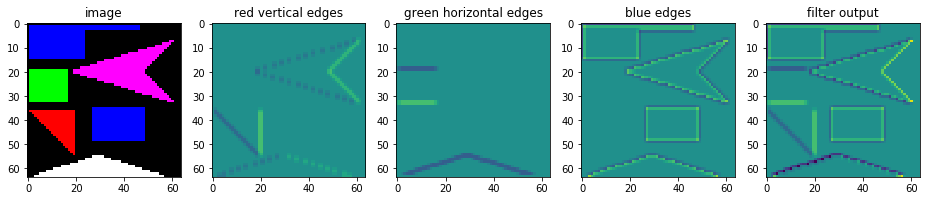

In [16]:
# Turn spike indices into image
# **NOTE** image is RGB
image = np.zeros(INPUT_SIZE * INPUT_SIZE * INPUT_CHANNELS)
image[spike_indices] = 1
image = np.reshape(image, (INPUT_SIZE, INPUT_SIZE, INPUT_CHANNELS))

# Use OpenCV to calculate convolution
filter_out = [cv2.filter2D(image[:,:,i], cv2.CV_64F, filt[i]) for i in range(INPUT_CHANNELS)]

# Show results
fig, axes = plt.subplots(1, 5, figsize=(16,4))
axes[0].set_title("image")
axes[0].imshow(image);

axes[1].set_title("red vertical edges")
axes[1].imshow(filter_out[0], vmin=-10, vmax=10)

axes[2].set_title("green horizontal edges")
axes[2].imshow(filter_out[1], vmin=-10, vmax=10)

axes[3].set_title("blue edges")
axes[3].imshow(filter_out[2], vmin=-10, vmax=10)

axes[4].set_title("filter output")
axes[4].imshow(np.sum(filter_out, axis=0), vmin=-10, vmax=10)

## Toeplitz approach

In [27]:
# Zero pad filter to output size
zero_pad_filt = np.pad(filt, ((OUTPUT_SIZE - filt.shape[0], 0), (0, OUTPUT_SIZE - filt.shape[1]), (0, 0)), 
                       "constant", constant_values=0.0)
# Flip rows
zero_pad_filt = np.flipud(zero_pad_filt)

print(zero_pad_filt)
doubly_blocked_channels = []
for c in range(zero_pad_filt.shape[2]):
    # Build list of toeplitz matrices
    f_matrices = []
    for i in range(zero_pad_filt.shape[0]):
        toeplitz_col = zero_pad_filt[i,:,c]
        toeplitz_row = np.concatenate(((toeplitz_col[0],), np.zeros(INPUT_SIZE - 1)))
        f_matrices.append(toeplitz(toeplitz_col, toeplitz_row))

    # Show some of the submatrices
    #fig, axes = plt.subplots(1, 3, figsize=(16,2), sharey=True)
    #axes[0].imshow(f_matrices[0])
    #axes[0].set_title("F0")
    #axes[1].imshow(f_matrices[1])
    #axes[1].set_title("F1")
    #axes[2].imshow(f_matrices[2])
    #axes[2].set_title("F2")

    # doubly blocked toeplitz indices: 
    #  this matrix defines which toeplitz matrix from toeplitz_list goes to which part of the doubly blocked
    block_toeplitz_col = list(range(1, zero_pad_filt.shape[0] + 1))
    block_toeplitz_row = np.concatenate(((block_toeplitz_col[0],), np.zeros(INPUT_SIZE - 1, dtype=int)))
    block_indices = toeplitz(block_toeplitz_col, block_toeplitz_row)

    ## creat doubly blocked matrix with zero values
    toeplitz_shape = f_matrices[0].shape # shape of one toeplitz matrix

    doubly_blocked = np.zeros((toeplitz_shape[0] * block_indices.shape[0], 
                               toeplitz_shape[1] * block_indices.shape[1]))

    # tile toeplitz matrices for each row in the doubly blocked matrix
    for i in range(block_indices.shape[0]):
        for j in range(block_indices.shape[1]):
            start_i = i * toeplitz_shape[0]
            start_j = j * toeplitz_shape[1]
            end_i = start_i + toeplitz_shape[0]
            end_j = start_j + toeplitz_shape[1]
            doubly_blocked[start_i: end_i, start_j:end_j] = f_matrices[block_indices[i,j] - 1]
    
    doubly_blocked_channels.append(doubly_blocked)
    #fig, axis = plt.subplots(figsize=(12,12))
    #axis.imshow(doubly_blocked)
    #axis.set_title("Doubly-blocked matrix");
doubly_blocked = np.stack(doubly_blocked_channels)
print(doubly_blocked.shape)

(3, 3, 3)
[[[-1 -1 -1]
  [-1  8 -1]
  [-1 -1 -1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  2  1]
  [ 0  0  0]
  [-1 -2 -1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  0 -1]
  [ 2  0 -2]
  [ 1  0 -1]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
(3, 3844, 4096)


## Standard matrix multiply by Toeplitz
I suspect the difference in sign is due to cross-correlation vs convolution

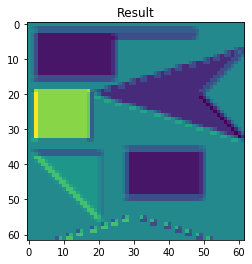

In [25]:
dense_result = [doubly_blocked[i].dot(image[:,:,i].flatten()) for i in range(INPUT_CHANNELS)]

dense_result = np.sum(dense_result, axis=0)
# Perform matrix-vector multiplication
#dense_result = doubly_blocked.dot(image.flatten())

fig, axis = plt.subplots()
axis.imshow(np.reshape(dense_result, (OUTPUT_SIZE, OUTPUT_SIZE)))
axis.set_title("Result");

## Sparse, spiking approach
We're not actually multiplying - just summing weights from rows where there's spikes

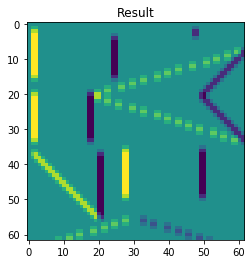

In [90]:
sparse_spike_output = np.zeros((OUTPUT_SIZE * OUTPUT_SIZE))

# Loop through spikes
for pre in spike_indices:
    # Determine which column of blocks contains pre
    # **NOTE** from the POV of connectivity matrices, the columns of the Toeplitz matrix are the rows
    j = pre // INPUT_SIZE
    col = pre % INPUT_SIZE

    # Rotate row of zero-padded filter corresponding to each block and concatenate together
    col_test = np.concatenate([np.pad(zero_pad_filt[max(-1, i-j)], (col, 0))[:OUTPUT_SIZE]
                               for i in range(OUTPUT_SIZE)])
    assert np.array_equal(doubly_blocked[:,pre], col_test)
    
    # Add to output
    sparse_spike_output += col_test

fig, axis = plt.subplots()
axis.imshow(np.reshape(sparse_spike_output, (OUTPUT_SIZE, OUTPUT_SIZE)))
axis.set_title("Result");

assert np.array_equal(dense_result, sparse_spike_output)

## Sparser, spiking approach
There's no point in using the zero-padded filters -  we can ignore zeroed rows and copy non-added columns into correct place rather than rotating

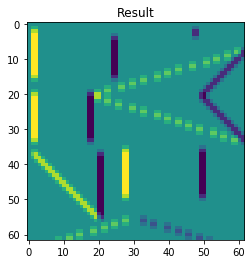

In [76]:
sparser_spike_output = np.zeros((OUTPUT_SIZE * OUTPUT_SIZE))

# Loop through spikes
for pre in spike_indices:
    # Determine which column of blocks contains pre
    # **NOTE** from the POV of connectivity matrices, the columns of the Toeplitz matrix are the rows
    j = pre // INPUT_SIZE
    col = pre % INPUT_SIZE
    row_len = min(filt.shape[1], OUTPUT_SIZE - col)
    
    # Loop through filter rows
    for i in range(j, min(OUTPUT_SIZE, j + filt.shape[0])):
        # Extract row of filter
        filter_row = filt[i - j]

        # Place it into correct slice of output
        start_out = (i * OUTPUT_SIZE) + col
        end_out = start_out + row_len
        sparser_spike_output[start_out:end_out] += filter_row[:row_len]
        
fig, axis = plt.subplots()
axis.imshow(np.reshape(sparser_spike_output, (OUTPUT_SIZE, OUTPUT_SIZE)))
axis.set_title("Result")

assert np.array_equal(dense_result, sparser_spike_output)

## Sparser, spiking approach rearranged for parallel implementation
If we re-arrange the loops slightly we're closer to something that could be efficiently postsynaptically parallelised

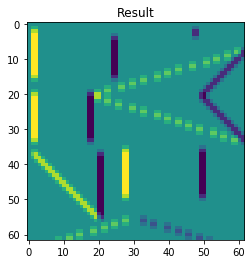

In [91]:
sparser_parallel_spike_output = np.zeros((OUTPUT_SIZE * OUTPUT_SIZE))

for blk in range(filt.shape[0]):
    # Extract row of filter (shared memory)
    filter_row = filt[blk]
    
    for thread in range(filt.shape[1]):
        # Loop through spikes
        for pre in spike_indices:
            # Determine which column of blocks contains pre
            # **NOTE** from the POV of connectivity matrices, the columns of the Toeplitz matrix are the rows
            j = pre // INPUT_SIZE
            col = pre % INPUT_SIZE

            # If we haven't gone off edge of output
            i = j + blk
            if i < OUTPUT_SIZE and thread < (OUTPUT_SIZE - col):
                start_out = (i * OUTPUT_SIZE) + col
                
                # Update output (coalesced reading of filter row and no collisions on atomic add)
                sparser_parallel_spike_output[start_out + thread] += filter_row[thread]

fig, axis = plt.subplots()
axis.imshow(np.reshape(sparser_parallel_spike_output, (OUTPUT_SIZE, OUTPUT_SIZE)))
axis.set_title("Result")

assert np.array_equal(dense_result, sparser_parallel_spike_output)